**Hierarchical Clustering**




In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [20]:
# Find cartesian Distance between the data points
def  cartesian_distance(r1,r2):
  distance=0.0
  for i in range(len(r1)):
    #print(r1[i],r2[i])
    distance+=(r1[i]-r2[i])**2
  #print(sqrt(distance))
  return sqrt(distance)

#caliculate Distance Matrix
def get_distancematrix(training_data):
  distance=np.zeros((len(training_data),len(training_data)))
  for i in range(0,len(training_data)):
    for j in range(0,len(training_data)):
      distance[i][j]=cartesian_distance(training_data[i],training_data[j])
  return distance

In [21]:
# to find the clusters formed for each iteration
def get_clusters(distance_matrix,mode):
    clusters = {}
    row = -1
    column = -1
    indices = []
    for i in range(distance_matrix.shape[0]):
        indices.append(i)
    clusters[0] = indices.copy()
    for k in range(1, distance_matrix.shape[0]):
        min_val = np.inf
        for i in range(0, distance_matrix.shape[0]):
            for j in range(0, distance_matrix.shape[1]):
                if(distance_matrix[i][j]<=min_val):
                    min_val = distance_matrix[i][j]
                    row = i
                    column = j   
        # distance_matrix = np.tril(distance_matrix) 
        # ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape) 
        # print(row,column)
        #mode is 0 then it is single  
        #update distance matrix by minimum distance
        if(mode == 0):
            for i in range(0,distance_matrix.shape[0]):
                if(i != column):
                    temp = min(distance_matrix[column][i],distance_matrix[row][i])
                    distance_matrix[column][i]  = temp
                    distance_matrix[i][column] = temp
        #mode is 1 then it is complete
        #update the distance matrix by maximum of distance
        elif(mode == 1):
             for i in range(0,distance_matrix.shape[0]):
                if(i != column and i!=row):
                    temp = max(distance_matrix[column][i],distance_matrix[row][i])
                    distance_matrix[column][i] = temp
                    distance_matrix[i][column] = temp
        #Linkage - Average if mode is 2
        #update the distance matrix by mean of distance
        elif(mode == 2):
             for i in range(0,distance_matrix.shape[0]):
                if(i != column and i!=row):
                    temp = (distance_matrix[column][i]+distance_matrix[row][i])/2
                    distance_matrix[column][i] = temp
                    distance_matrix[i][column] = temp
        for i in range (0,distance_matrix.shape[0]):
            distance_matrix[row][i] = np.inf
            distance_matrix[i][row] =np.inf
        minimum = min(row,column)
        maximum = max(row,column)
        for i in range(len(indices)):
            if(indices[i]==maximum):
                indices[i] = minimum
        clusters[k] = indices.copy()
    return clusters

In [22]:
#creating the cluster based on mode(linkage) and number of clusters
def agglomerative_clustering(training_data,nclusters,mode):  
    distances = get_distancematrix(training_data)
    np.fill_diagonal(distances,np.inf)
    clusters = get_clusters(distances,mode)     
    #cut off is the iteration at which the n clusters form
    cutoff = distances.shape[0] - nclusters
    # print(cutoff)
    clusters = clusters[cutoff]
    cluster_values=plot_clusters(training_data,clusters,mode)
    # print(np.unique(clusters))
    return clusters,cluster_values

In [23]:
#plotting the clusters
def plot_clusters(training_data,clusters,mode):  
    indices = []
    cluster_values={}
    for i in range(len(np.unique(clusters))):
      cluster_values[i]=[]
    for x in np.nditer(np.unique(clusters)):
        indices.append(np.where(clusters==x))  
    fig = plt.figure(figsize=(10,6))
    linkage={0:'single',1:'Complete',2:'Average'}
    plot_title='Plotting clusters of '+linkage[mode]+' linkage; clusters is '+str(len(np.unique(clusters))) 
    fig.suptitle(plot_title)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('A')
    ax.set_ylabel('P')
    ax.set_zlabel('C')
    point=0
    color=['red','orange','blue','brown','pink','green','violet','grey','yellow',"purple"]
    for i in range(0,len(indices)):
        for j in np.nditer(indices[i]):
               ax.scatter(training_data[j,0],training_data[j,1],training_data[j,2], c=color[point])
               cluster_values[point].append([training_data[j,0],training_data[j,1],training_data[j,2]])
        point = point + 1
    # plt.legend()
    plt.show()
    return cluster_values


In [24]:
#checking accuracy by counting more number of labels in the cluster and checking how much accuracately the cluster was derived 
def accuracycheck(training_data,cluster,column_names):
  k=0
  training_data=training_data.tolist()
  df=pd.DataFrame(training_data,columns=column_names)
  # print(df)
  cluster_index=list(range(len(training_data)))
  # print(clusters)
  for i in np.unique(cluster):
    target_0=0
    target_1=0
    target_2=0
    for j in range(len(training_data)):
      if(cluster[j]==i):
        if(training_data[j][-1]==0):
          target_0+=1
          cluster_index[training_data.index(training_data[j])]=k
        elif(training_data[j][-1]==1):
          target_1+=1
          cluster_index[training_data.index(training_data[j])]=k
        elif(training_data[j][-1]==2):
          target_2+=1
          cluster_index[training_data.index(training_data[j])]=k
    print(f'Cluster {k} ,size  is {target_0+target_1+target_2}')
    print(f'Target0 Count : {target_0} Target1 Count : {target_1} Target2 Count : {target_2}')
    k+=1
  # print(len(cluster_index))
  df.insert(7, 'Cluster', cluster_index)
  return df


In [25]:
# ratio of  lowest intercluster distance to the highest intracluster distance 
def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*1000   
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)]) 
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
    return np.max(values)
    
def dunn(k_list):
    deltas = np.ones([len(k_list), len(k_list)])*1000
    # print(deltas)
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

--------------------------------------------single-----------------------------------------------------------------------


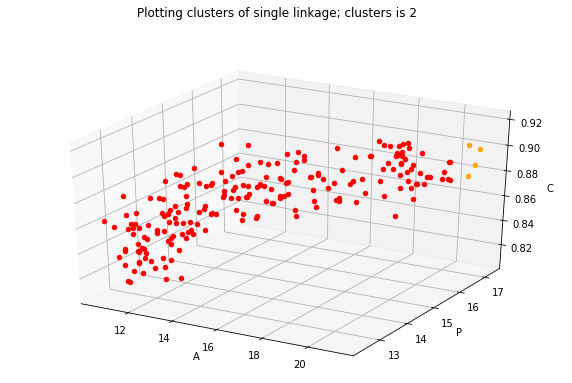

Cluster 0 ,size  is 206
Target0 Count : 70 Target1 Count : 66 Target2 Count : 70
Cluster 1 ,size  is 4
Target0 Count : 0 Target1 Count : 4 Target2 Count : 0


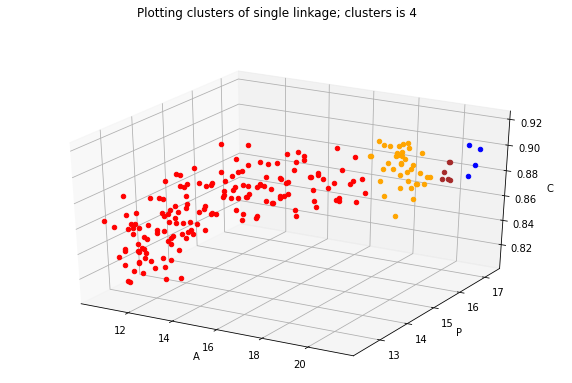

Cluster 0 ,size  is 162
Target0 Count : 70 Target1 Count : 22 Target2 Count : 70
Cluster 1 ,size  is 38
Target0 Count : 0 Target1 Count : 38 Target2 Count : 0
Cluster 2 ,size  is 4
Target0 Count : 0 Target1 Count : 4 Target2 Count : 0
Cluster 3 ,size  is 6
Target0 Count : 0 Target1 Count : 6 Target2 Count : 0


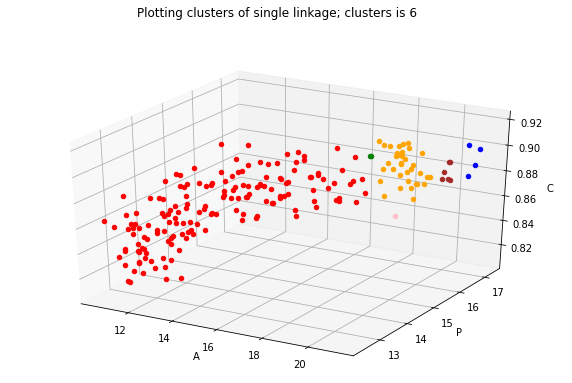

Cluster 0 ,size  is 162
Target0 Count : 70 Target1 Count : 22 Target2 Count : 70
Cluster 1 ,size  is 35
Target0 Count : 0 Target1 Count : 35 Target2 Count : 0
Cluster 2 ,size  is 4
Target0 Count : 0 Target1 Count : 4 Target2 Count : 0
Cluster 3 ,size  is 6
Target0 Count : 0 Target1 Count : 6 Target2 Count : 0
Cluster 4 ,size  is 1
Target0 Count : 0 Target1 Count : 1 Target2 Count : 0
Cluster 5 ,size  is 2
Target0 Count : 0 Target1 Count : 2 Target2 Count : 0


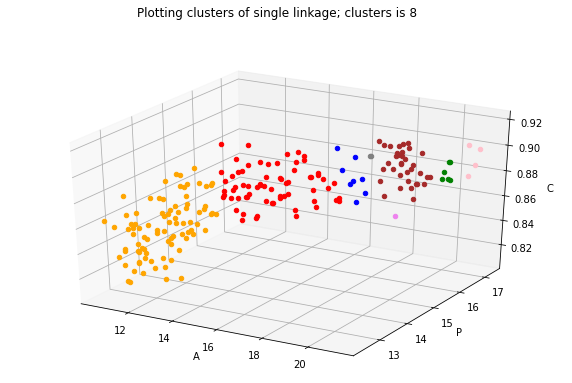

Cluster 0 ,size  is 67
Target0 Count : 52 Target1 Count : 15 Target2 Count : 0
Cluster 1 ,size  is 87
Target0 Count : 17 Target1 Count : 0 Target2 Count : 70
Cluster 2 ,size  is 8
Target0 Count : 1 Target1 Count : 7 Target2 Count : 0
Cluster 3 ,size  is 35
Target0 Count : 0 Target1 Count : 35 Target2 Count : 0
Cluster 4 ,size  is 4
Target0 Count : 0 Target1 Count : 4 Target2 Count : 0
Cluster 5 ,size  is 6
Target0 Count : 0 Target1 Count : 6 Target2 Count : 0
Cluster 6 ,size  is 1
Target0 Count : 0 Target1 Count : 1 Target2 Count : 0
Cluster 7 ,size  is 2
Target0 Count : 0 Target1 Count : 2 Target2 Count : 0
**--------------------------------------------------------------------------------------------------------------------------------**
--------------------------------------------Complete-----------------------------------------------------------------------


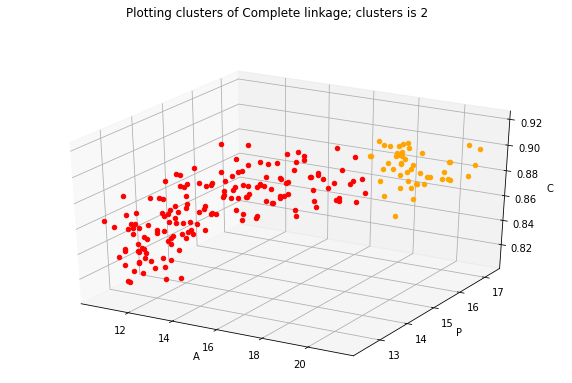

Cluster 0 ,size  is 162
Target0 Count : 70 Target1 Count : 22 Target2 Count : 70
Cluster 1 ,size  is 48
Target0 Count : 0 Target1 Count : 48 Target2 Count : 0


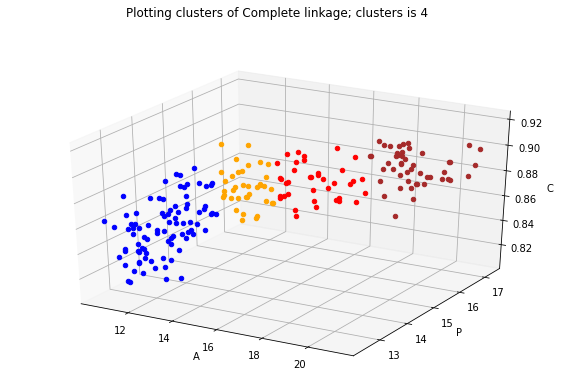

Cluster 0 ,size  is 38
Target0 Count : 16 Target1 Count : 22 Target2 Count : 0
Cluster 1 ,size  is 37
Target0 Count : 37 Target1 Count : 0 Target2 Count : 0
Cluster 2 ,size  is 87
Target0 Count : 17 Target1 Count : 0 Target2 Count : 70
Cluster 3 ,size  is 48
Target0 Count : 0 Target1 Count : 48 Target2 Count : 0


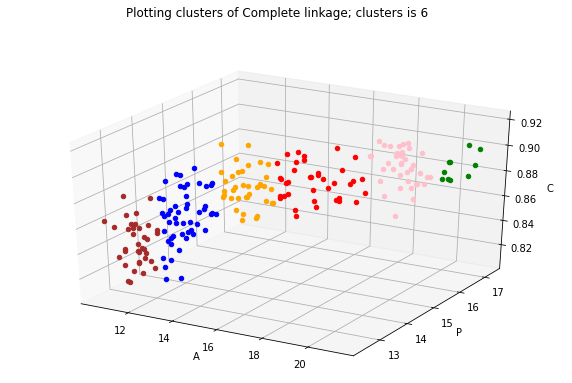

Cluster 0 ,size  is 38
Target0 Count : 16 Target1 Count : 22 Target2 Count : 0
Cluster 1 ,size  is 37
Target0 Count : 37 Target1 Count : 0 Target2 Count : 0
Cluster 2 ,size  is 51
Target0 Count : 15 Target1 Count : 0 Target2 Count : 36
Cluster 3 ,size  is 36
Target0 Count : 2 Target1 Count : 0 Target2 Count : 34
Cluster 4 ,size  is 38
Target0 Count : 0 Target1 Count : 38 Target2 Count : 0
Cluster 5 ,size  is 10
Target0 Count : 0 Target1 Count : 10 Target2 Count : 0


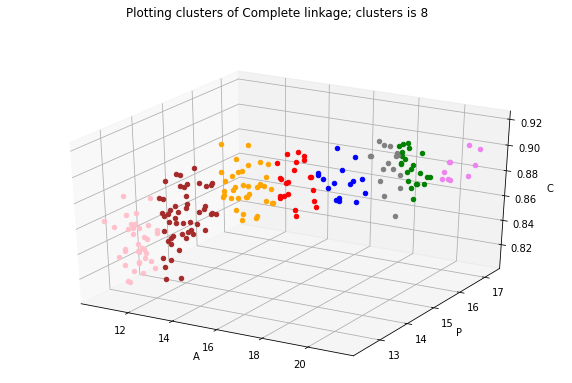

Cluster 0 ,size  is 22
Target0 Count : 13 Target1 Count : 9 Target2 Count : 0
Cluster 1 ,size  is 37
Target0 Count : 37 Target1 Count : 0 Target2 Count : 0
Cluster 2 ,size  is 16
Target0 Count : 3 Target1 Count : 13 Target2 Count : 0
Cluster 3 ,size  is 51
Target0 Count : 15 Target1 Count : 0 Target2 Count : 36
Cluster 4 ,size  is 36
Target0 Count : 2 Target1 Count : 0 Target2 Count : 34
Cluster 5 ,size  is 22
Target0 Count : 0 Target1 Count : 22 Target2 Count : 0
Cluster 6 ,size  is 10
Target0 Count : 0 Target1 Count : 10 Target2 Count : 0
Cluster 7 ,size  is 16
Target0 Count : 0 Target1 Count : 16 Target2 Count : 0
**--------------------------------------------------------------------------------------------------------------------------------**
--------------------------------------------Average-----------------------------------------------------------------------


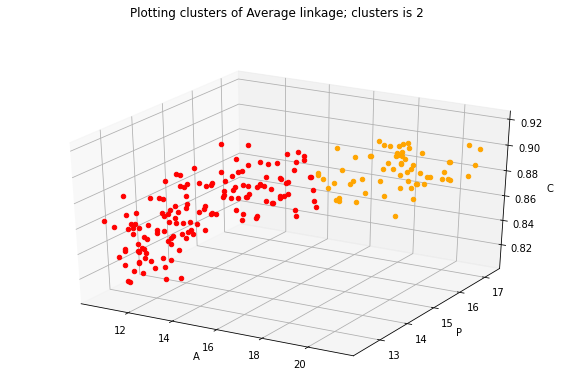

Cluster 0 ,size  is 146
Target0 Count : 67 Target1 Count : 9 Target2 Count : 70
Cluster 1 ,size  is 64
Target0 Count : 3 Target1 Count : 61 Target2 Count : 0


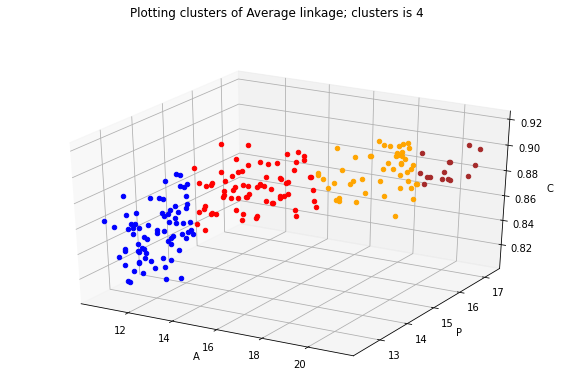

Cluster 0 ,size  is 72
Target0 Count : 57 Target1 Count : 9 Target2 Count : 6
Cluster 1 ,size  is 49
Target0 Count : 3 Target1 Count : 46 Target2 Count : 0
Cluster 2 ,size  is 74
Target0 Count : 10 Target1 Count : 0 Target2 Count : 64
Cluster 3 ,size  is 15
Target0 Count : 0 Target1 Count : 15 Target2 Count : 0


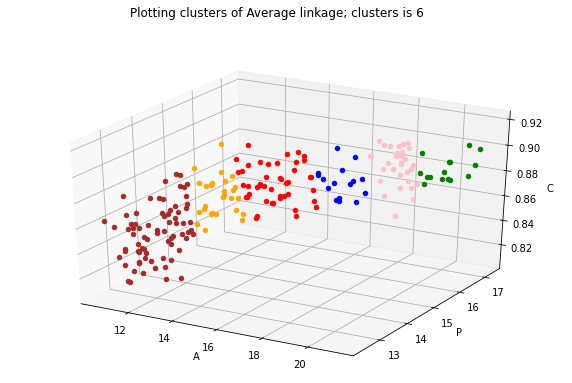

Cluster 0 ,size  is 45
Target0 Count : 36 Target1 Count : 9 Target2 Count : 0
Cluster 1 ,size  is 27
Target0 Count : 21 Target1 Count : 0 Target2 Count : 6
Cluster 2 ,size  is 16
Target0 Count : 3 Target1 Count : 13 Target2 Count : 0
Cluster 3 ,size  is 74
Target0 Count : 10 Target1 Count : 0 Target2 Count : 64
Cluster 4 ,size  is 33
Target0 Count : 0 Target1 Count : 33 Target2 Count : 0
Cluster 5 ,size  is 15
Target0 Count : 0 Target1 Count : 15 Target2 Count : 0


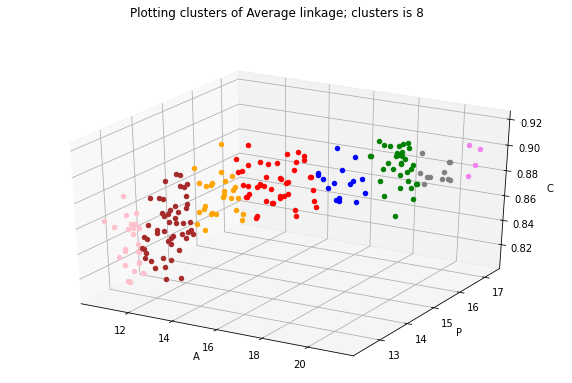

Cluster 0 ,size  is 45
Target0 Count : 36 Target1 Count : 9 Target2 Count : 0
Cluster 1 ,size  is 27
Target0 Count : 21 Target1 Count : 0 Target2 Count : 6
Cluster 2 ,size  is 16
Target0 Count : 3 Target1 Count : 13 Target2 Count : 0
Cluster 3 ,size  is 50
Target0 Count : 8 Target1 Count : 0 Target2 Count : 42
Cluster 4 ,size  is 24
Target0 Count : 2 Target1 Count : 0 Target2 Count : 22
Cluster 5 ,size  is 33
Target0 Count : 0 Target1 Count : 33 Target2 Count : 0
Cluster 6 ,size  is 4
Target0 Count : 0 Target1 Count : 4 Target2 Count : 0
Cluster 7 ,size  is 11
Target0 Count : 0 Target1 Count : 11 Target2 Count : 0
**--------------------------------------------------------------------------------------------------------------------------------**
[0.0534156321691521, 0.04442600730811919, 0.03812931888465065, 0.07691101080514225, 0.04442600730811919, 0.06916072105161272, 0.06530022488653042, 0.05222158801325096, 0.030554209772356244, 0.037321673651123405, 0.053766584920652706, 0.047242976

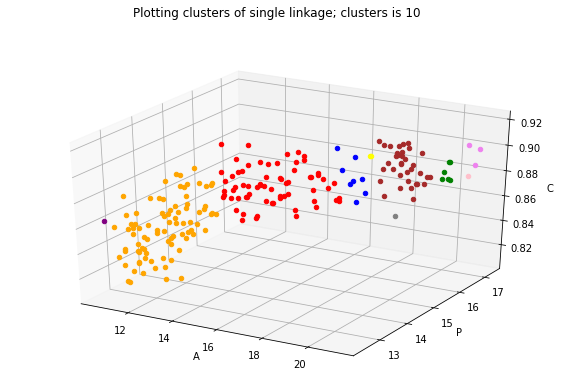

Cluster 0 ,size  is 67
Target0 Count : 52 Target1 Count : 15 Target2 Count : 0
Cluster 1 ,size  is 86
Target0 Count : 17 Target1 Count : 0 Target2 Count : 69
Cluster 2 ,size  is 8
Target0 Count : 1 Target1 Count : 7 Target2 Count : 0
Cluster 3 ,size  is 35
Target0 Count : 0 Target1 Count : 35 Target2 Count : 0
Cluster 4 ,size  is 1
Target0 Count : 0 Target1 Count : 1 Target2 Count : 0
Cluster 5 ,size  is 6
Target0 Count : 0 Target1 Count : 6 Target2 Count : 0
Cluster 6 ,size  is 3
Target0 Count : 0 Target1 Count : 3 Target2 Count : 0
Cluster 7 ,size  is 1
Target0 Count : 0 Target1 Count : 1 Target2 Count : 0
Cluster 8 ,size  is 2
Target0 Count : 0 Target1 Count : 2 Target2 Count : 0
Cluster 9 ,size  is 1
Target0 Count : 0 Target1 Count : 0 Target2 Count : 1


In [42]:
training_data = pd.read_csv('Seed_Data.csv')
dataf=training_data
training_data=training_data.values
column_names=dataf.columns
modes=[0,1,2]
#0 is single , 1 is complete and 2 is average
linkage={0:'single',1:'Complete',2:'Average'}
max_dun=[]
for mode in [0,1,2]:
  print(f'--------------------------------------------{linkage[mode]}-----------------------------------------------------------------------')
  for i in [2,4,6,8]:
    clusters,cluster_values=agglomerative_clustering(training_data[:,:3],i,mode) # data is trained without labels
    clust_list=[]
    for j in  range(len(np.unique(clusters))):
        clust_list.append(pd.DataFrame(cluster_values[j]).values)
    # print(clust_list)
    max_dun.append(dunn(clust_list))
    new_df=accuracycheck(training_data,clusters,column_names)
    # print(new_df)
    # print(f'Dunn index for i clusters is {dunn(clust_list)}')
    # accuracycheck(training_data,clusters)
  print(f'**--------------------------------------------------------------------------------------------------------------------------------**')

print(max_dun)
unlabelled_data=training_data[:,:3]
clusters,cluster_values=agglomerative_clustering(unlabelled_data,10,0) # data is trained without labels
new_df=accuracycheck(training_data,clusters,column_names)


Enter linkage you wanted : 
 0. Single 1. Complete 2. Average2


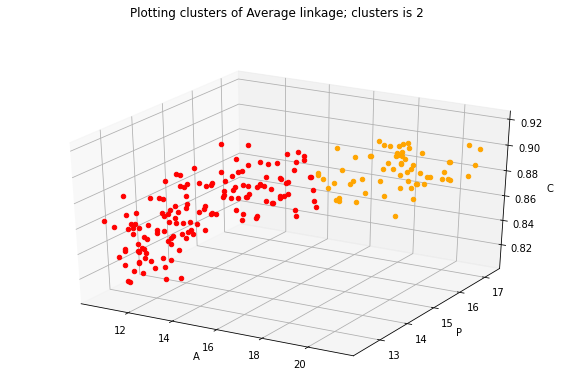

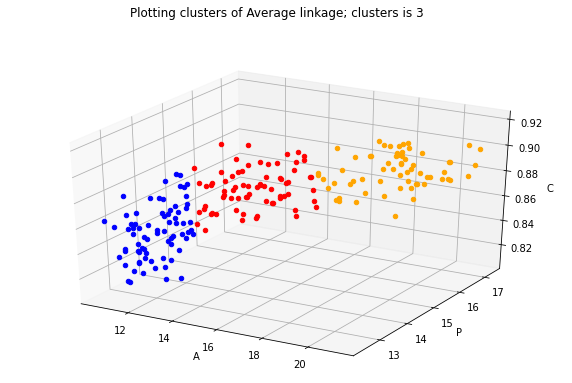

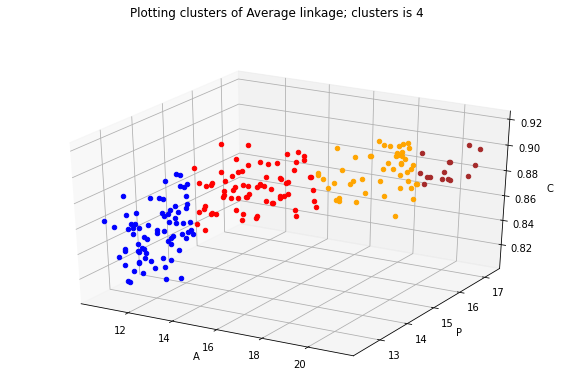

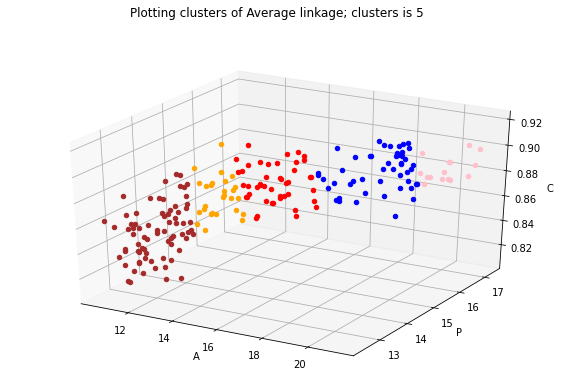

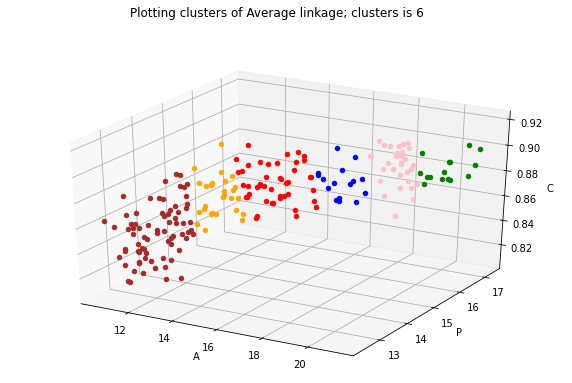

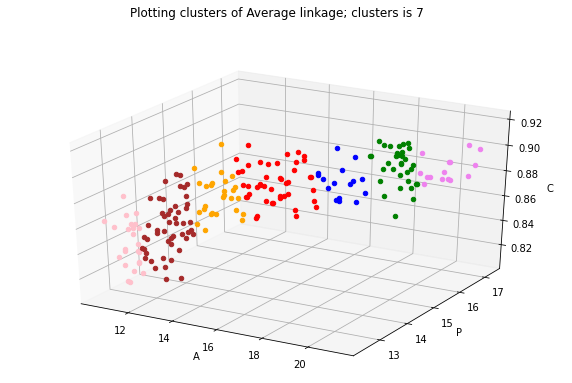

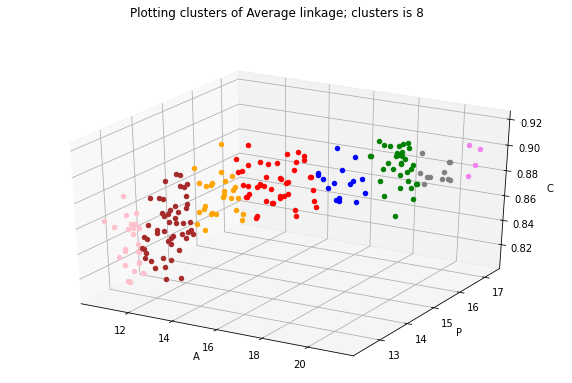

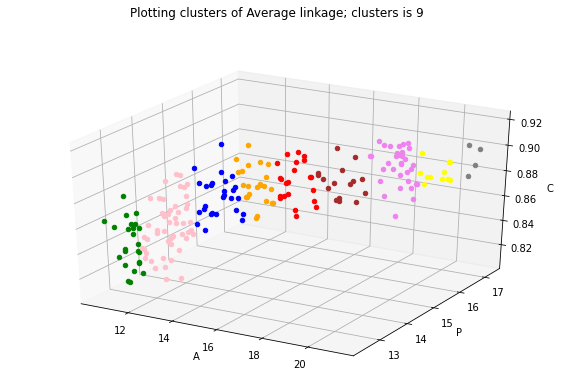

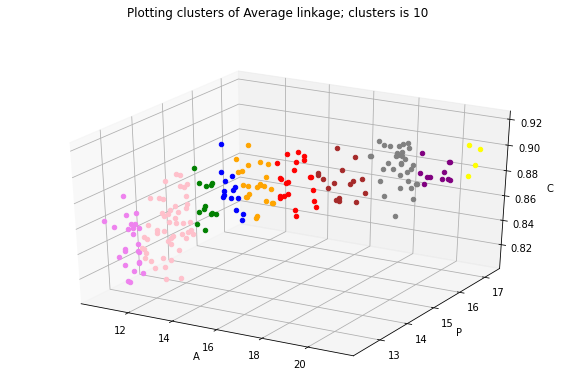

CLuster 2 , Dunn Index is  0.030554209772356244
CLuster 3 , Dunn Index is  0.0313086339967885
CLuster 4 , Dunn Index is  0.037321673651123405
CLuster 5 , Dunn Index is  0.04406397340807478
CLuster 6 , Dunn Index is  0.053766584920652706
CLuster 7 , Dunn Index is  0.04724297667398409
CLuster 8 , Dunn Index is  0.04724297667398409
CLuster 9 , Dunn Index is  0.06793044683705206
CLuster 10 , Dunn Index is  0.06793044683705206
Max dunn Index is at cluster 9


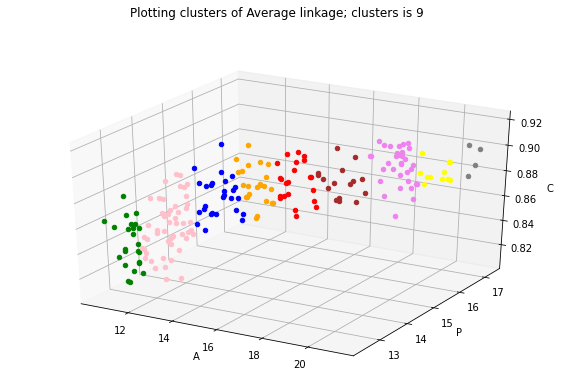

Cluster 0 ,size  is 22
Target0 Count : 13 Target1 Count : 9 Target2 Count : 0
Cluster 1 ,size  is 23
Target0 Count : 23 Target1 Count : 0 Target2 Count : 0
Cluster 2 ,size  is 27
Target0 Count : 21 Target1 Count : 0 Target2 Count : 6
Cluster 3 ,size  is 16
Target0 Count : 3 Target1 Count : 13 Target2 Count : 0
Cluster 4 ,size  is 50
Target0 Count : 8 Target1 Count : 0 Target2 Count : 42
Cluster 5 ,size  is 24
Target0 Count : 2 Target1 Count : 0 Target2 Count : 22
Cluster 6 ,size  is 33
Target0 Count : 0 Target1 Count : 33 Target2 Count : 0
Cluster 7 ,size  is 4
Target0 Count : 0 Target1 Count : 4 Target2 Count : 0
Cluster 8 ,size  is 11
Target0 Count : 0 Target1 Count : 11 Target2 Count : 0


In [43]:
# import pandas as pd
training_data = pd.read_csv('Seed_Data.csv')
dataf=training_data
training_data=training_data.values
column_names=dataf.columns
max_dun=[]
linkage=int(input("Enter linkage you wanted : \n 0. Single 1. Complete 2. Average"))
for n_cluster in [2,3,4,5,6,7,8,9,10]: 
  clusters,cluster_values=agglomerative_clustering(unlabelled_data,n_cluster,linkage) # data is trained without labels
  clust_list=[]
  for j in  range(len(np.unique(clusters))):
    clust_list.append(pd.DataFrame(cluster_values[j]).values)
  max_dun.append(dunn(clust_list))

for i in range(len(max_dun)):
  print(f'CLuster {i+2} , Dunn Index is  {max_dun[i]}')
max_value = max(max_dun)
max_cluster=max_dun.index(max_value)+2
print(f'Max dunn Index is at cluster {max_cluster}')
clusters,cluster_values=agglomerative_clustering(unlabelled_data,max_cluster,linkage) # data is trained without labels
new_df=accuracycheck(training_data,clusters,column_names)

 **KNN Algorithm:**

In [44]:

# Find cartesian Distance between the data points
def  cartesian_distance_KNN(r1,r2):
  distance=0.0
  # print(r1)
  for i in range(len(r1)-1):
    #print(r1[i],r2[i])
    distance+=(r1[i]-r2[i])**2
  #print(sqrt(distance))
  return sqrt(distance)

# Get distance vector - finds the distance between the test data point and each training data points and sorts based on distance
def get_distancevector(training_data,test_data):
  distance=list()
  for i in training_data:
    distance.append((i,cartesian_distance_KNN(i,test_data)))
  distance.sort(key=lambda tup: tup[1]) # sort tuples based on nearest distance(w.r.t distance)
  #print('Distance Vector:')
  #print(distance)
  return distance

#Get K Neighbours - we will find the k-nearest neigbors based on the distance vector found
def get_kneighbors(distance,k):
  neighbors = list()
  #print(f'k={k} nearest neighbours')
  for i in range(k):
    neighbors.append(distance[i][0])
  #print(neighbors)
  return neighbors
  
#Predict the gender - takes training data, test data, k-value as input and predicts the gender 
def predict_gender(training_data,test_data,k):
  distance=get_distancevector(training_data,test_data)
  kneighbors=get_kneighbors(distance,k)
  labels = [row[-1] for row in kneighbors]
  prediction = max(set(labels), key=labels.count)
  return prediction

#leave out evaluation - gives the 
def leave_out(training_dat):
  leaveout=[]
  correct=0
  counter=0
  train=training_dat.copy()
  accuracy=[]
  error=[]
  for k_val in [1,3,5,7,9]:
    correct=0
    counter=0
    incorrect=0
    for i in training_dat:
      leaveout=train.copy()
      leaveout.remove(i)
      #print(len(leaveout))
      counter+=1
      predicted=predict_gender(leaveout,i,k_val)
      actual=i[-1]
      #print(f'Predicted :{predicted} , actual {actual},{i}')
      if(predicted==actual):
        #print(f'Predicted :{predicted} , actual {actual},{i}')
        correct+=1
      else:
        incorrect+=1
    accurate=(correct/counter)*100
    erroneous=(incorrect/counter)*100
    accuracy.append(accurate)
    error.append(erroneous)
    #print(correct,incorrect)
  return accuracy,error

Leave One out Accuracy comparision for the best cluster with linkage opted by user vs Actual KNN

In [45]:
training_data = pd.read_csv('Seed_Data.csv')
k_value={0:1,1:3,2:5,3:7,4:9}
print('*******************************************')
print('Accuracy for KNN After Clustering is given below')
accuracy,errorneous=leave_out(new_df.values.tolist()) # after clustering leave one out accuracy
for i in range(len(accuracy)):
  print(f'K value {k_value[i]} acuuracy is {accuracy[i]}')
print('************************************************')

print('Accuracy for KNN without Clustering')
accuracy,errorneous=leave_out(training_data.values.tolist())
for i in range(len(accuracy)):
  print(f'K value {k_value[i]} acuuracy is {accuracy[i]}')
print('************************************************')

*******************************************
Accuracy for KNN After Clustering is given below
K value 1 acuuracy is 90.47619047619048
K value 3 acuuracy is 88.09523809523809
K value 5 acuuracy is 87.14285714285714
K value 7 acuuracy is 88.09523809523809
K value 9 acuuracy is 87.14285714285714
************************************************
Accuracy for KNN without Clustering
K value 1 acuuracy is 90.47619047619048
K value 3 acuuracy is 88.57142857142857
K value 5 acuuracy is 87.61904761904762
K value 7 acuuracy is 89.52380952380953
K value 9 acuuracy is 90.47619047619048
************************************************


**Clustering and KNN based on user choice**


Enter linkage 
0. Single
 1. Complete 
 2.Average 1
Enter number of cluster10


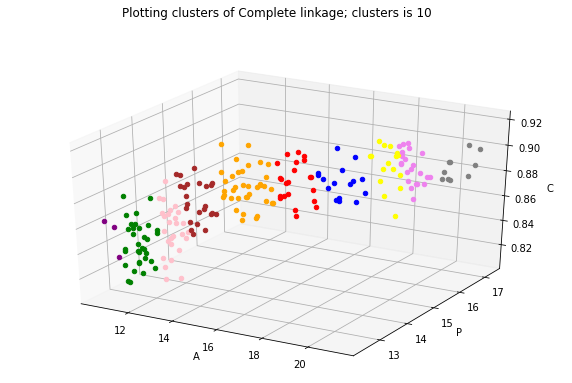

Cluster 0 ,size  is 22
Target0 Count : 13 Target1 Count : 9 Target2 Count : 0
Cluster 1 ,size  is 37
Target0 Count : 37 Target1 Count : 0 Target2 Count : 0
Cluster 2 ,size  is 16
Target0 Count : 3 Target1 Count : 13 Target2 Count : 0
Cluster 3 ,size  is 24
Target0 Count : 12 Target1 Count : 0 Target2 Count : 12
Cluster 4 ,size  is 27
Target0 Count : 3 Target1 Count : 0 Target2 Count : 24
Cluster 5 ,size  is 33
Target0 Count : 2 Target1 Count : 0 Target2 Count : 31
Cluster 6 ,size  is 22
Target0 Count : 0 Target1 Count : 22 Target2 Count : 0
Cluster 7 ,size  is 10
Target0 Count : 0 Target1 Count : 10 Target2 Count : 0
Cluster 8 ,size  is 16
Target0 Count : 0 Target1 Count : 16 Target2 Count : 0
Cluster 9 ,size  is 3
Target0 Count : 0 Target1 Count : 0 Target2 Count : 3
*******************************************
Accuracy for KNN After Clustering is given below
K value 1 acuuracy is 90.95238095238095
K value 3 acuuracy is 89.52380952380953
K value 5 acuuracy is 90.0
K value 7 acuuracy is

In [47]:
training_data = pd.read_csv('Seed_Data.csv')
training_data=training_data.values
linkage=int(input('Enter linkage \n0. Single\n 1. Complete \n 2.Average '))
max_cluster=int(input('Enter number of cluster'))
clusters,cluster_values=agglomerative_clustering(unlabelled_data,max_cluster,linkage) # data is trained without labels
new_df=accuracycheck(training_data,clusters,column_names)
k_value={0:1,1:3,2:5,3:7,4:9}
print('*******************************************')
print('Accuracy for KNN After Clustering is given below')
accuracy,errorneous=leave_out(new_df.values.tolist()) # after clustering leave one out accuracy
for i in range(len(accuracy)):
  print(f'K value {k_value[i]} acuuracy is {accuracy[i]}')
print('************************************************')




Splitting 70 percent train and 30 percent test and getting leaveone out  accuarcy on Training  and test accuracy by training the train data

In [48]:
from sklearn.model_selection import train_test_split
k_value={0:1,1:3,2:5,3:7,4:9}
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=72)
x_train['classifi']=y_train
accuracy,_=leave_out(x_train.values.tolist())
print('*********************************************************************')
print('Train Accuracy for Train Data split 70 percent for Clustered Data')
for i in range(len(accuracy)):
  print(f'Accuracy for {k_value[i]} is {accuracy[i]}')
# leave_out(x_train.values.tolist())
y_pred=[]
test_k=7
for i in x_test.values:
  y_pred.append(predict_gender(x_train.values.tolist(),i,test_k))
# print(y_test.values)
# print(y_pred)
y_actual=y_test.values
correct=0
for i in range(len(y_actual)):
  if(y_pred[i]==y_actual[i]):
    correct+=1
print('*********************************************************************')
print(f'Accuracy after training the data(with cluster ID) and testing remaining 30 percent for {test_k} value  is  {correct*100/len(y_actual)}')

*********************************************************************
Train Accuracy for Train Data split 70 percent for Clustered Data
Accuracy for 1 is 91.83673469387756
Accuracy for 3 is 88.43537414965986
Accuracy for 5 is 92.51700680272108
Accuracy for 7 is 92.51700680272108
Accuracy for 9 is 91.15646258503402
*********************************************************************
Accuracy after training the data(with cluster ID) and testing remaining 30 percent for 7 value  is  92.06349206349206
